# Obtain ground truth params for test datasets

Convenience notebook for creating ground truth parameters for test datasets.

In [1]:
from pathlib import Path

from multiview_stitcher._tests import test_bench
from multiview_stitcher import vis_utils, io

import importlib
importlib.reload(test_bench)

<module 'multiview_stitcher._tests.test_bench' from '/Users/malbert/software/multiview-stitcher/src/multiview_stitcher/_tests/test_bench.py'>

/Users/malbert/software/multiview-stitcher/image-datasets/test_bench_data


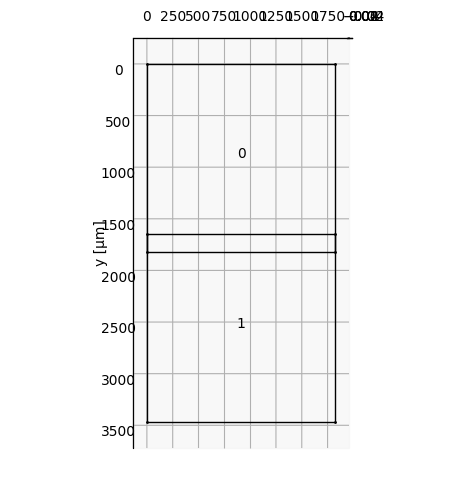

(<Figure size 640x480 with 1 Axes>,
 <Axes3D: xlabel='z [μm]', ylabel='x [μm]', zlabel='y [μm]'>)

In [2]:
print(test_bench.test_bench_data_dir)

dataset = test_bench.datasets[0]
msims = test_bench.get_msims_from_dataset(dataset)

vis_utils.plot_positions(msims, io.METADATA_TRANSFORM_KEY, use_positional_colors=False)

In [3]:
params = test_bench.register_dataset(msims, dataset)

In [7]:

from napari_stitcher import viewer_utils
import napari

viewer = napari.Viewer(ndisplay=2)
lds = viewer_utils.create_image_layer_tuples_from_msims(
    msims, transform_key='registered', n_colors=4, contrast_limits=[0, 1000])
viewer_utils.add_image_layer_tuples_to_viewer(viewer, lds, manage_viewer_transformations=True)
viewer.reset_view()
    

In [ ]:
# doesn't work with time

from multiview_stitcher import vis_utils, ngff_utils, msi_utils
import importlib
importlib.reload(vis_utils)

import tempfile

with tempfile.TemporaryDirectory() as tmp_dir:

    tmp_dir = Path(tmp_dir)
    # tmp_dir = Path("/Users/malbert/Downloads")

    zarr_paths = [tmp_dir / f"sim_{imsim}.zarr" for imsim, msim in enumerate(msims)]

    sims = [msi_utils.get_sim_from_msim(msim) for msim in msims]

    for imsim, msim in enumerate(msims):
        ngff_utils.write_sim_to_ome_zarr(
            msi_utils.get_sim_from_msim(msim),
            zarr_paths[imsim], overwrite=False)

    # sims = [ngff_utils.write_sim_to_ome_zarr(
    #     msi_utils.get_sim_from_msim(msim),
    #     zarr_paths[imsim], overwrite=False) for imsim, msim in enumerate(msims)]

    vis_utils.view_neuroglancer(
        sims,
        zarr_paths=zarr_paths,
        # channel_coord='DAPI',
        transform_key="registered",
        # single_layer=False,
    )

Opening Neuroglancer in browser...
URL: https://neuroglancer-demo.appspot.com/#!%7B%22dimensions%22%3A%7B%22t%22%3A%5B1.0%2C%22%22%5D%2C%22c%22%3A%5B1.0%2C%22%22%5D%2C%22y%22%3A%5B8.913225446428579e-07%2C%22%22%5D%2C%22x%22%3A%5B8.913225446428579e-07%2C%22%22%5D%7D%2C%22displayDimensions%22%3A%5B%22x%22%2C%22y%22%5D%2C%22layerListPanel%22%3A%7B%22visible%22%3Atrue%7D%2C%22layout%22%3A%22xy%22%2C%22layers%22%3A%5B%7B%22type%22%3A%22image%22%2C%22source%22%3A%7B%22url%22%3A%22zarr%3A//http%3A//localhost%3A8000/sim_0.zarr%22%2C%22transform%22%3A%7B%22matrix%22%3A%5B%5B1.0%2C0.0%2C0.0%2C0.0%2C0.0%5D%2C%5B0.0%2C1.0%2C0.0%2C0.0%2C0.0%5D%2C%5B0.0%2C0.0%2C1.0%2C0.0%2C0.0%5D%2C%5B0.0%2C0.0%2C0.0%2C1.0%2C0.0%5D%5D%2C%22outputDimensions%22%3A%7B%22t%22%3A%5B1.0%2C%22%22%5D%2C%22c%27%22%3A%5B1.0%2C%22%22%5D%2C%22y%22%3A%5B8.913225446428579e-07%2C%22%22%5D%2C%22x%22%3A%5B8.913225446428579e-07%2C%22%22%5D%7D%7D%7D%2C%22localDimensions%22%3A%7B%22c%27%22%3A%5B1%2C%22%22%5D%7D%2C%22localPosition%22%3A

SystemExit: 0

/Users/malbert/miniconda3/envs/ms_dev/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3587: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.

